**데이터셋 불러오기**


In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt

drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
df = pd.read_csv("/content/drive/MyDrive/vgames2 (1).csv")
df = df.drop("Unnamed: 0", axis = 1)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


**EDA 및 전처리**

In [4]:
#전체 행열 수 확인
df.shape

(16598, 9)

In [5]:
# 전체 중복값 여부 확인
df.duplicated(subset = None, keep = False).sum()

2

In [6]:
#중복값 삭제
df = df.drop_duplicates()
df.shape # 중복열 삭제 확인 

(16597, 9)

In [7]:
#결측치 확인하기
df.isnull().sum()

Name             0
Platform         0
Year           270
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [8]:
#결측치 값을 "Unknown"으로 통일
df = df.fillna("Unknown")

#결측치 재확인
df.isnull().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [9]:
#데이터 타입 확인
df.dtypes

Name           object
Platform       object
Year           object
Genre          object
Publisher      object
NA_Sales       object
EU_Sales       object
JP_Sales       object
Other_Sales    object
dtype: object

In [10]:
#def toFloat(string):
      #return string.replace({"K":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval).astype(float)
#'float' object has no attribute 'replace' 오류

In [11]:
# 위와 같은 함수를 작동시켰을 때 에러 발생. 데이터 변환 일단 일일이 작성

df['NA_Sales'] = df['NA_Sales'].replace({"K":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval).astype(float)
df['EU_Sales'] = df['EU_Sales'].replace({"K":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval).astype(float)
df['JP_Sales'] = df['JP_Sales'].replace({"K":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval).astype(float)
df['Other_Sales'] = df['Other_Sales'].replace({"K":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval).astype(float)

In [12]:
#데이터타입 정상 변환 확인
df.dtypes

Name            object
Platform        object
Year            object
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object

In [13]:
#전처리- Noisy Data 먼저 없애기 
# 50 이상의 값을 이상치의 기준으로 잡고,df>10인 row를 전부 drop한 후 데이터를 분석한다. 

indexNames = df[ df["NA_Sales"] > 50 ].index 
df.drop(indexNames , inplace=True)

indexNames = df[ df["EU_Sales"] > 50 ].index 
df.drop(indexNames , inplace=True)

indexNames = df[ df["JP_Sales"] > 50 ].index 
df.drop(indexNames , inplace=True)

indexNames = df[ df["Other_Sales"] > 50 ].index 
df.drop(indexNames , inplace=True)

In [14]:
#총 Sales column 만들기

df["All_Sales"] = df["NA_Sales"] + df["EU_Sales"] + df["JP_Sales"] + df["Other_Sales"]

In [15]:
df.shape

(16138, 10)

**지역에 따른 장르 선호도에 차이가 있는가?**




  1. 지역별 장르 종류 확인하기 

In [16]:
#중복을 제외한 장르 종류 확인하기
df.drop_duplicates(['Genre'], keep = "first")


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,All_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,0.04
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
5,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0.00,0.00,0.14,0.00,0.14
6,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0.00,0.00,0.03
12,Mount & Blade,PC,2008.0,Role-Playing,Paradox Interactive,0.00,0.02,0.00,0.00,0.02
13,The Professor's Brain Trainer: Logic,DS,2005.0,Puzzle,505 Games,0.02,0.00,0.00,0.00,0.02
16,Rise of Nations,PC,2003.0,Strategy,Microsoft Game Studios,0.01,0.02,0.00,0.01,0.04
24,Injustice: Gods Among Us,PS3,2013.0,Fighting,Warner Bros. Interactive Entertainment,0.48,0.53,0.01,0.23,1.25


  2. 지역에 따른 장르별 판매량  

In [17]:
#지역에 따른 선호 장르 - 일본
df_jgen = df.groupby("Genre").agg({'JP_Sales':'sum'}).sort_values(by = "JP_Sales", ascending = False)
print(df_jgen)

#지역에 따른 선호 장르 - 유럽
df_egen = df.groupby("Genre").agg({'EU_Sales':'sum'}).sort_values(by = "EU_Sales", ascending = False)
print(df_egen)

#지역에 따른 선호 장르 - 미국
df_ngen = df.groupby("Genre").agg({'NA_Sales':'sum'}).sort_values(by = "NA_Sales", ascending = False)
print(df_ngen)

#지역에 따른 선호 장르 - 그외
df_ogen = df.groupby("Genre").agg({'Other_Sales':'sum'}).sort_values(by = "Other_Sales", ascending = False)
print(df_ogen)

#지역에 따른 선호 장르 - 전체
df_agen = df.groupby("Genre").agg({'All_Sales':'sum'}).sort_values(by = "All_Sales", ascending = False)
print(df_agen)

              JP_Sales
Genre                 
Role-Playing    326.77
Action          153.21
Sports          132.39
Platform        123.54
Misc            104.78
Fighting         84.01
Simulation       62.12
Puzzle           56.85
Racing           53.10
Adventure        51.37
Strategy         48.11
Shooter          37.37
Unknown           8.54
              EU_Sales
Genre                 
Action          497.56
Sports          358.74
Shooter         297.57
Racing          226.59
Misc            206.85
Platform        186.99
Role-Playing    167.99
Simulation      109.00
Fighting         96.46
Adventure        61.55
Puzzle           50.27
Strategy         44.02
Unknown           8.85
              NA_Sales
Genre                 
Action          825.53
Sports          653.95
Shooter         555.52
Platform        416.49
Misc            397.14
Racing          340.19
Role-Playing    297.39
Fighting        214.54
Simulation      177.03
Puzzle          120.74
Adventure       102.12
Strategy   

In [18]:
#데이터 프레임 합치기 및 전치 
loc_df =  pd.concat([df_jgen, df_egen, df_ngen, df_ogen, df_agen], axis = 1).rename(columns = {'JP_Sales': 'Japan', 'EU_Sales':'Europe', 'NA_Sales':'North America', 'Other_Sales':'Others','All_Sales':'Sum'})
loc_df 

,Japan,Europe,North America,Others,Sum
Genre,,,,,
Role-Playing,326.77,167.99,297.39,53.34,845.49
Action,153.21,497.56,825.53,179.17,1655.47
Sports,132.39,358.74,653.95,129.43,1274.51
Platform,123.54,186.99,416.49,48.39,775.41
Misc,104.78,206.85,397.14,72.11,780.88
Fighting,84.01,96.46,214.54,35.09,430.10
Simulation,62.12,109.00,177.03,30.15,378.30
Puzzle,56.85,50.27,120.74,12.27,240.13
Racing,53.10,226.59,340.19,74.66,694.54


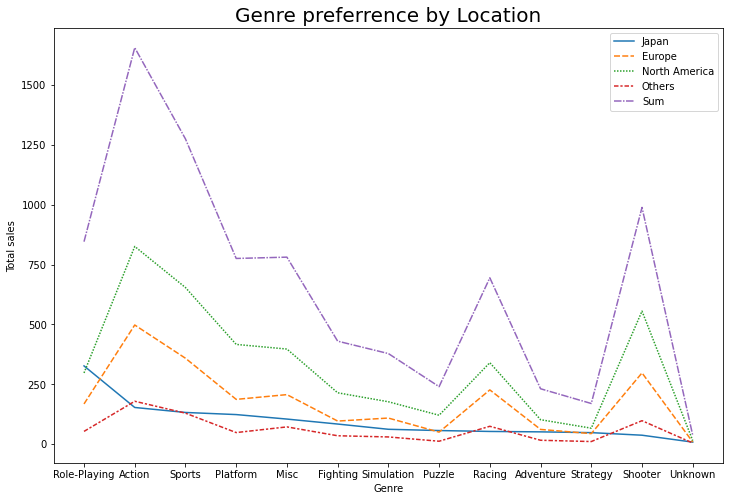

In [19]:
sns.set
plt.figure(figsize=(12, 8))
plt.title("Genre preferrence by Location", fontsize=20)
plt.ylabel("Total sales", fontsize=10)

sns.lineplot(data=loc_df);

1. 북미 판매량이 다른 나라들보다 많다는 사실을 알 수 있다
2. 일본만 role-playing 장르를 가장 선호했다. 

<function matplotlib.pyplot.show>

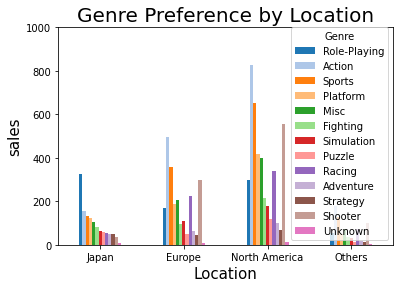

In [20]:
loc_df = loc_df.drop(columns = ["Sum"]).T
#barplot 시각화
colors = sns.color_palette("tab20", 13)
loc_df.plot.bar(rot = 0, color = colors)

plt.rcParams["figure.figsize"] = (20, 10) #plt 크기 더 크게 조정
plt.title("Genre Preference by Location", fontsize =20)
plt.xlabel("Location", fontsize = 15)
plt.ylabel("sales", fontsize = 15)
plt.ylim(0,1000)
plt.show

일본을 제외한 나머지 나라들의 상위 5개 게임 장르들은 대체적으로 비슷한 순위를 나타내는 경향을 보인다. 하지만 일본을 제외하더라도 세부적인 순위에는 차이가 있기 때문에, 지역에 따라서 선호하는 게임 장르가 일치한다고 하기는 어렵다. 

**연도별 게임의 트렌드 분석해보기**



In [21]:
#중복을 제외한 연도 확인하기
df.drop_duplicates(['Year'], keep = "first")

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,All_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
5,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0.00,0.00,0.14,0.00,0.14
6,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0.00,0.00,0.03
8,Imabikisou,PS3,2007.0,Adventure,Sega,0.00,0.00,0.04,0.00,0.04
11,Harvest Moon: More Friends of Mineral Town,GBA,2003.0,Simulation,Ubisoft,0.14,0.05,0.00,0.00,0.19
14,Zoids Dash,DS,2006.0,Role-Playing,Tomy Corporation,0.00,0.00,0.02,0.00,0.02
17,Hajime no Ippo: The Fighting! (2014),PS3,2014.0,Sports,Namco Bandai Games,0.00,0.00,0.03,0.00,0.03
18,Grand Kingdom,PS4,2015.0,Role-Playing,Nippon Ichi Software,0.02,0.00,0.03,0.00,0.05


In [22]:
df = df.loc[df['Year'] != "Unknown"] #특정 row 이름으로 제거

In [23]:
#행이름 바꾸기
def year(x):
  if (x >= 0) & (x < 20):
    return int(2000 + x)
  elif (x > 70) & (x < 1000):
    return int(1900 + x)
  else:
    return int(x)

df['Year'] = df['Year'].apply(year)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [24]:
#df['Year'] = df['Year'].replace(['86','94','95','96','97','98','0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16'],['1986','1994','1995','1996','1997','1998','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016']) 


**연도별 지역 출고량**

In [25]:
#연도에 따른 선호 장르 - 일본
df_jy = df.groupby("Year").agg({'JP_Sales':'sum'}).sort_values(by = "JP_Sales", ascending = False)

#유럽
df_ey = df.groupby("Year").agg({'EU_Sales':'sum'}).sort_values(by = "EU_Sales", ascending = False)

#미국
df_ny = df.groupby("Year").agg({'NA_Sales':'sum'}).sort_values(by = "NA_Sales", ascending = False)

#그외
df_oy = df.groupby("Year").agg({'Other_Sales':'sum'}).sort_values(by = "Other_Sales", ascending = False)

year_df =  pd.concat([df_jy, df_ey, df_ny, df_oy], axis = 1)
year_df

,JP_Sales,EU_Sales,NA_Sales,Other_Sales
Year,,,,
1980,0.00,0.67,10.59,0.12
1981,0.00,1.85,31.56,0.30
1982,0.00,1.65,26.92,0.31
1983,8.10,0.80,7.76,0.14
1984,14.27,2.10,33.28,0.70
1985,13.64,4.64,33.27,0.90
1986,19.81,2.84,12.50,1.93
1987,11.63,1.41,8.46,0.20
1988,15.06,5.41,18.48,0.80


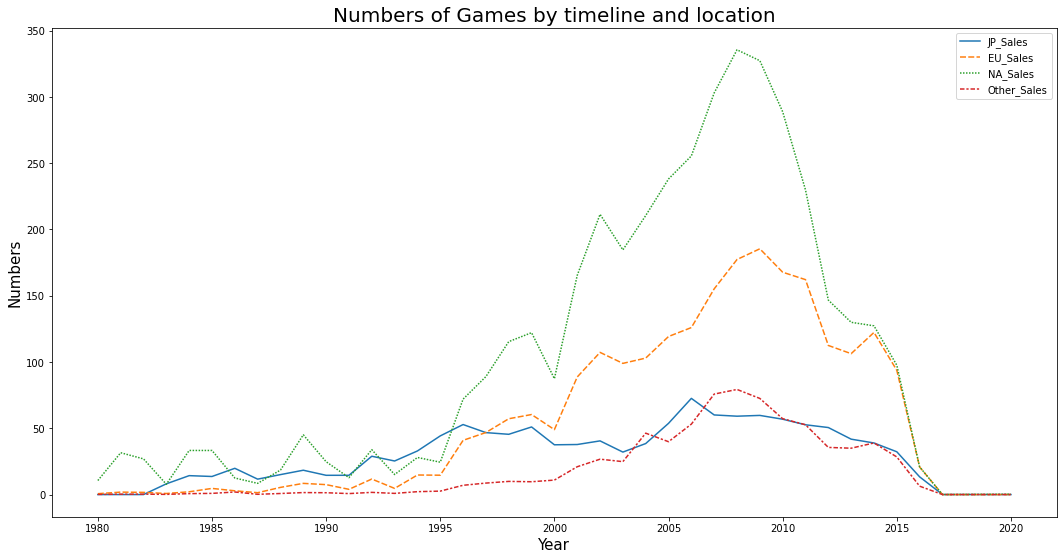

In [26]:
sns.set
plt.figure(figsize=(18, 9))
plt.title("Numbers of Games by timeline and location", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Numbers", fontsize=15)

sns.lineplot(data=year_df);

대제적으로 북아메리카의 출고량이 압도적으로 많다는 것을 알 수 있다. 전체 게임의 출고량은 2000년부터 2010년까지 많이 나오다가, 2010년부터 다시 하락세를 그린다는 것을 알 수 있다. 

**10년 단위 연도별 게임 추이 분석 및 시각화**


1. 출고량 기준




In [27]:
#80년대 장르별 게임의 개수 

df_80s = df.loc[(df['Year'] > 1970)&(df["Year"] < 1990)]
df_80s.sort_values(by = ['Year'])

df_80s = df_80s.groupby(['Genre'])['Year'].count().sort_values(ascending = False)
df_80s

Genre
Action          65
Platform        31
Shooter         30
Sports          22
Puzzle          18
Role-Playing     9
Misc             8
Racing           8
Fighting         4
Simulation       3
Adventure        2
Unknown          1
Name: Year, dtype: int64

In [28]:
#90년대 장르별 게임 수

df_90s = df.loc[(df['Year'] > 1989)&(df["Year"] < 2000)]
df_90s.sort_values(by = ['Year'])

df_90s = df_90s.groupby(['Genre'])['Year'].count().sort_values(ascending = False)
df_90s

Genre
Sports          297
Fighting        189
Racing          173
Role-Playing    167
Action          155
Shooter         132
Strategy        122
Platform        119
Misc            111
Adventure        95
Simulation       79
Puzzle           71
Unknown           5
Name: Year, dtype: int64

In [29]:
#00년대 장르수대로 

df_00s = df.loc[(df['Year'] > 1999)&(df["Year"] < 2010)]
df_00s.sort_values(by = ['Year'])

df_00s = df_00s.groupby(['Genre'])['Year'].count().sort_values(ascending = False)
df_00s

Genre
Action          1530
Sports          1364
Misc             993
Racing           775
Role-Playing     706
Shooter          700
Adventure        620
Platform         543
Simulation       538
Fighting         434
Strategy         371
Puzzle           353
Unknown           29
Name: Year, dtype: int64

In [30]:
#10년대 이후 출고 장르수

df_10s = df.loc[(df['Year'] > 2009)]
df_10s.sort_values(by = ['Year'])

df_10s = df_10s.groupby(['Genre'])['Year'].count().sort_values(ascending = False)
df_10s

Genre
Action          1399
Sports           555
Misc             545
Role-Playing     539
Adventure        533
Shooter          379
Racing           229
Simulation       208
Fighting         187
Strategy         164
Platform         143
Puzzle           113
Unknown           13
Name: Year, dtype: int64

In [31]:
#출고수별 

df_count = pd.concat([df_80s, df_90s, df_00s, df_10s], axis = 1)
df_count.columns = ['80s', '90s', '00s', '10s and up']
df_count

,80s,90s,00s,10s and up
Genre,,,,
Action,65.0,155,1530,1399
Platform,31.0,119,543,143
Shooter,30.0,132,700,379
Sports,22.0,297,1364,555
Puzzle,18.0,71,353,113
Role-Playing,9.0,167,706,539
Misc,8.0,111,993,545
Racing,8.0,173,775,229
Fighting,4.0,189,434,187


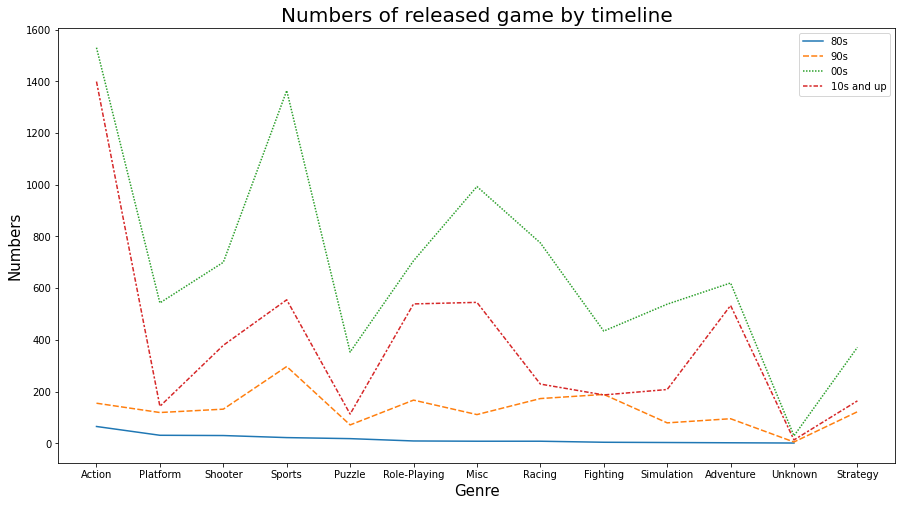

In [32]:
sns.set
plt.figure(figsize=(15, 8))
plt.title("Numbers of released game by timeline", fontsize=20)
plt.xlabel("Genre", fontsize=15)
plt.ylabel("Numbers", fontsize=15)

sns.lineplot(data=df_count);

2000년대에 들어서면서 게임 수요가 급격히 늘어나, 전체적인 출고량이 늘어났다는 것을 알 수 있다. 


또한, 전반적으로 다양한 장르를 소비했던 80,90년대와는 대조적으로 액션게임이 폭발적으로 많이 출고되었다는 것을 알 수 있는데, 이는 아래의 세대별 판매량 그래프에서 액션게임의 판매량과 비례한다.

2. 전체 기간 판매량 기준


In [33]:
#80년대 장르별 게임 판매치

df_80s2 = df.loc[(df['Year'] > 1970)&(df["Year"] < 1990)]
df_80s2.sort_values(by = ['Year'])

df_80s2 = df_80s2.groupby(['Genre'])['All_Sales'].sum().sort_values(ascending = False)
df_80s2

Genre
Platform        113.30
Puzzle           62.69
Shooter          59.77
Action           49.13
Sports           31.78
Role-Playing     15.25
Racing           12.10
Misc              8.44
Fighting          7.24
Adventure         4.78
Simulation        0.51
Unknown           0.50
Name: All_Sales, dtype: float64

In [34]:
#90년대 장르별 판매치

df_90s2 = df.loc[(df['Year'] > 1989)&(df["Year"] < 2000)]
df_90s2.sort_values(by = ['Year'])

df_90s2 = df_90s2.groupby(['Genre'])['All_Sales'].sum().sort_values(ascending = False)
df_90s2

Genre
Platform        193.01
Role-Playing    166.56
Sports          144.98
Racing          132.90
Action          123.22
Fighting        119.08
Shooter          67.21
Misc             62.97
Strategy         57.38
Simulation       50.05
Adventure        41.35
Puzzle           38.94
Unknown           3.54
Name: All_Sales, dtype: float64

In [35]:
#00년대 장르별 판매치

df_00s2 = df.loc[(df['Year'] > 1999)&(df["Year"] < 2010)]
df_00s2.sort_values(by = ['Year'])

df_00s2 = df_00s2.groupby(['Genre'])['All_Sales'].sum().sort_values(ascending = False)
df_00s2

Genre
Action          822.69
Sports          777.77
Misc            472.63
Racing          426.58
Shooter         424.82
Role-Playing    380.89
Platform        357.76
Simulation      254.82
Fighting        221.20
Adventure       120.39
Puzzle          115.09
Strategy         77.25
Unknown          19.37
Name: All_Sales, dtype: float64

In [36]:
#10년대 장르별 판매치

df_10s2 = df.loc[(df['Year'] > 2009)]
df_10s2.sort_values(by = ['Year'])

df_10s2 = df_10s2.groupby(['Genre'])['All_Sales'].sum().sort_values(ascending = False)
df_10s2

Genre
Action          633.19
Shooter         426.04
Sports          299.87
Role-Playing    279.28
Misc            224.81
Racing          117.73
Platform        109.41
Fighting         77.72
Simulation       70.89
Adventure        60.57
Strategy         33.46
Puzzle           21.05
Unknown          13.56
Name: All_Sales, dtype: float64

In [37]:
df_sales = pd.concat([df_80s2, df_90s2, df_00s2, df_10s2], axis = 1)
df_sales.columns = ['80s', '90s', '00s', '10s and up']
df_sales 

,80s,90s,00s,10s and up
Genre,,,,
Platform,113.30,193.01,357.76,109.41
Puzzle,62.69,38.94,115.09,21.05
Shooter,59.77,67.21,424.82,426.04
Action,49.13,123.22,822.69,633.19
Sports,31.78,144.98,777.77,299.87
Role-Playing,15.25,166.56,380.89,279.28
Racing,12.10,132.90,426.58,117.73
Misc,8.44,62.97,472.63,224.81
Fighting,7.24,119.08,221.20,77.72


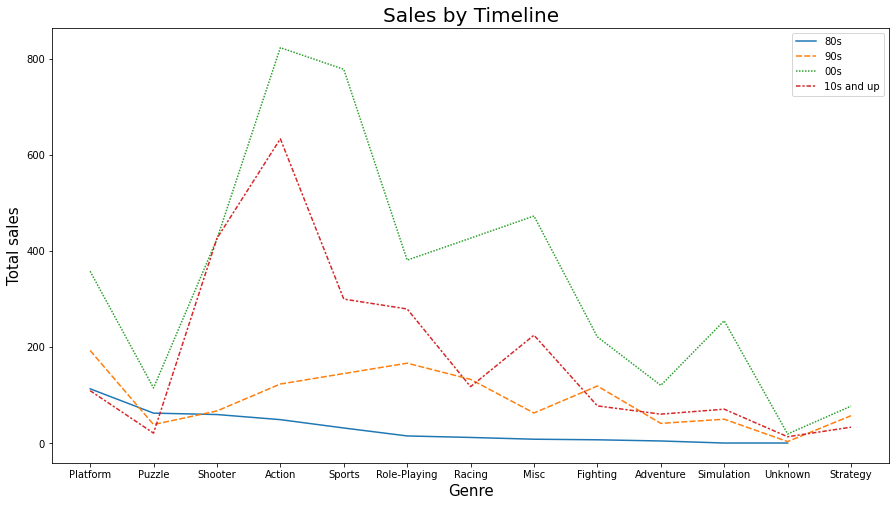

In [38]:
sns.set
plt.figure(figsize=(15, 8))
plt.title("Sales by Timeline", fontsize=20)
plt.xlabel("Genre", fontsize=15)
plt.ylabel("Total sales", fontsize=15)

sns.lineplot(data=df_sales);

**출고량이 높은 게임에 대한 분석 및 시각화 프로세스**

**2010년부터의 장르별 전체 게임 출고량**

<function matplotlib.pyplot.show>

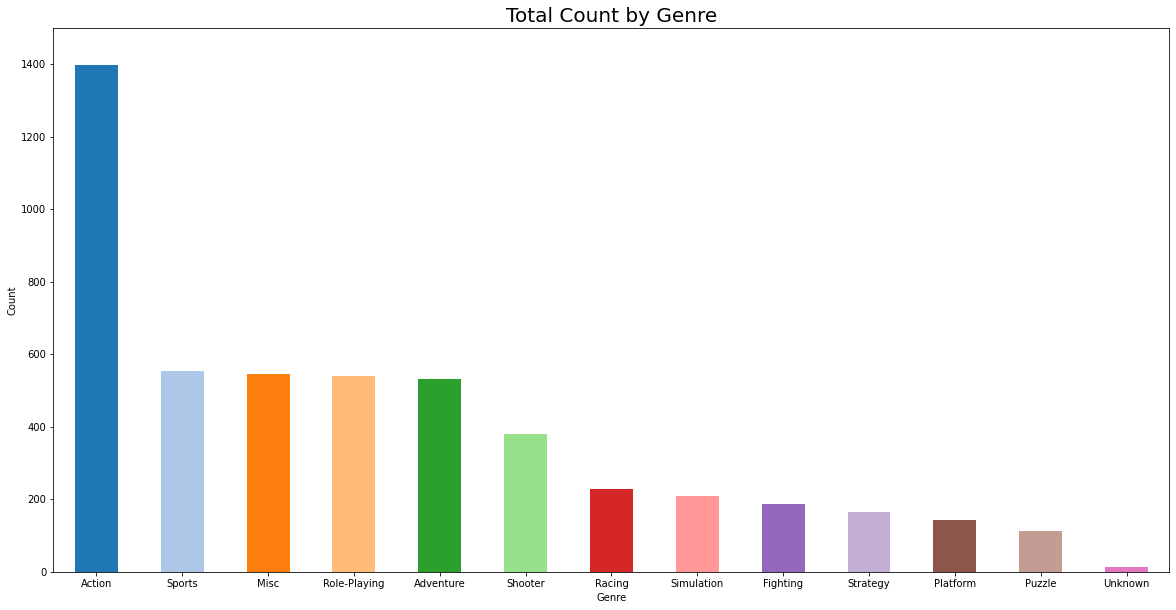

In [39]:
#groupby로 2010년대 각 장르별 게임 출고량 구하기/.sort_values()로 값이 큰 순서대로 정렬 
df2 = df.loc[(df['Year'] > 2009)]
df2 = df2.groupby(df2['Genre'])["All_Sales"].count().sort_values(ascending = False)

#barplot 시각화
colors = sns.color_palette("tab20", 13)
df2.plot.bar(rot = 0, color = colors)

plt.rcParams["figure.figsize"] = (20, 10) #plt 크기 더 크게 조정
plt.title("Total Count by Genre", fontsize = 20)
plt.ylabel("Count")
plt.ylim(0,1500)
plt.show

출고량과 판매량에는 유의미한 연관성이 없다. shooter 게임의 출고량이 6순위이지만, 판매량은 2순위이다. 

**2010년부터의 장르별 전체 게임 판매량**



<function matplotlib.pyplot.show>

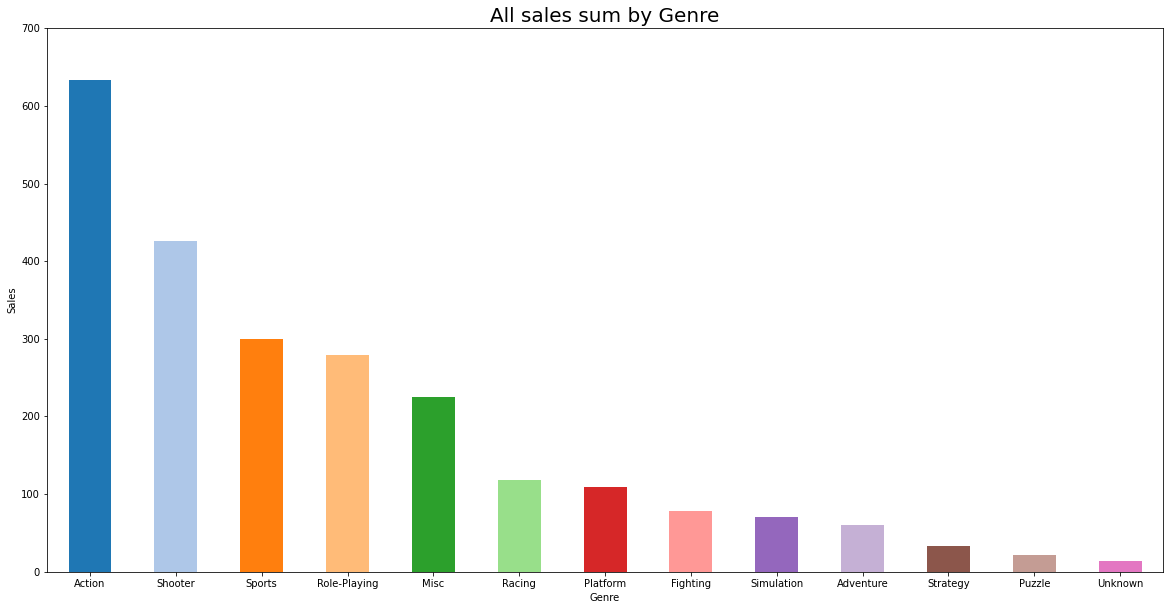

In [40]:
#groupby로 2010년대 각 장르별 게임 판매량 순위 구하기/.sort_values()로 값이 큰 순서대로 정렬 
df3 = df.loc[(df['Year'] > 2009)]
df3 = df3.groupby(df3['Genre'])['All_Sales'].sum().sort_values(ascending = False)
#barplot 시각화
colors = sns.color_palette("tab20", 13)
df3.plot.bar(rot = 0, color = colors)

plt.rcParams["figure.figsize"] = (20, 10) #plt 크기 더 크게 조정
plt.title("All sales sum by Genre", fontsize = 20)
plt.ylabel("Sales")
plt.ylim(0,700)
plt.show

**귀무가설: 출고량과 판매량에는 연관성이 없다 **

In [41]:
from scipy import stats

pv2 = stats.ttest_ind(df_count,df_sales, equal_var=False).pvalue
pv2

array([       nan, 0.12879707, 0.01775444, 0.08645689])

**2010년부터의 선호 플랫폼 순위**

<function matplotlib.pyplot.show>

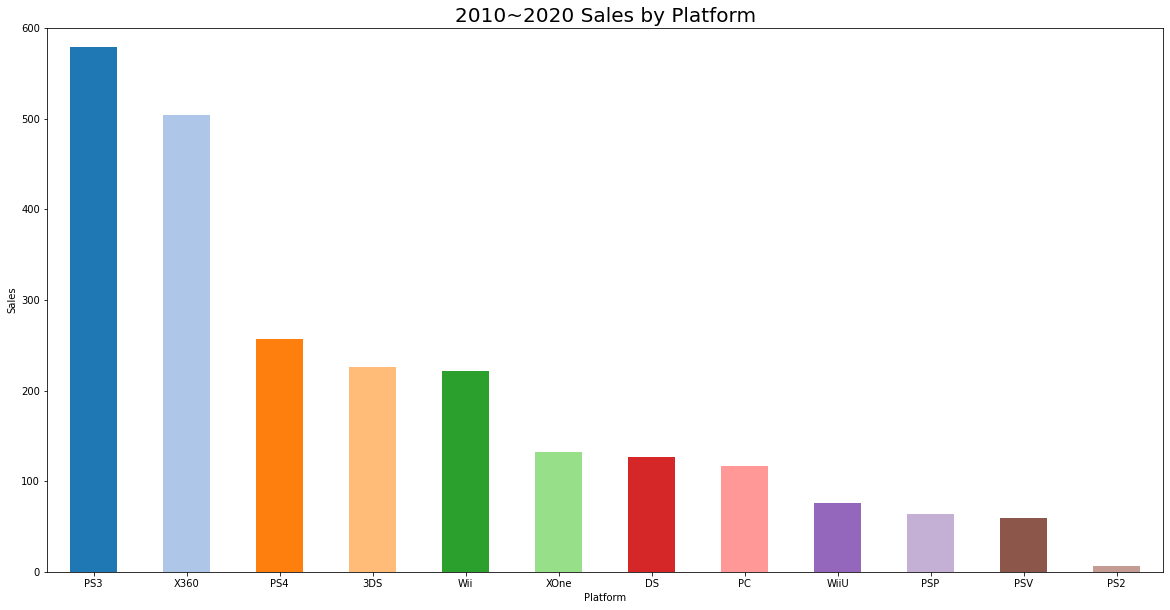

In [42]:
#groupby로 2000년대 각 플랫폼별 게임 판매량 순위 구하기/.sort_values()로 값이 큰 순서대로 정렬 
df4 = df.loc[(df['Year'] > 2009)]
df4 = df4.groupby(df4['Platform'])['All_Sales'].sum().sort_values(ascending = False)
#barplot 시각화
colors = sns.color_palette("tab20", 13)
df4.plot.bar(rot = 0, color = colors)

plt.rcParams["figure.figsize"] = (15, 10) #plt 크기 더 크게 조정
plt.title("2010~2020 Sales by Platform", fontsize = 20)
plt.ylabel("Sales")
plt.ylim(0,600)
plt.show

**PS3 플랫폼에서 출시된 게임의 장르 살펴보기**

In [43]:
df4 = df.loc[(df['Year'] > 2009)]
df4 = df4.groupby(['Platform','Genre'])['All_Sales'].sum()
df4[["PS4"]]


Platform  Genre       
PS4       Action          83.15
          Adventure        4.70
          Fighting         8.04
          Misc             7.37
          Platform         6.99
          Puzzle           0.02
          Racing          11.57
          Role-Playing    21.84
          Shooter         67.20
          Simulation       0.77
          Sports          42.10
          Strategy         0.42
          Unknown          2.38
Name: All_Sales, dtype: float64

PS3에서는 Action이 192.21, shooter가 127.86으로 압도적으로 많고, 
두번째로 판매량이 높았던 X360에서는 Shooter가 142.12, Action이 123.93이었다. 

In [44]:
df5 = df.loc[(df['Year'] > 2009)]
df5 = df5.groupby(['Platform','Year']).count()
df5 = df5[["All_Sales"]]
print(df5)

#plat_sales = pd.DataFrame(index = ['3DS','DS','PC','PS2','PS3','PS4','PSP','PSV','Wii','WiiU','X360','XOne'], 
                          #columns = ['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020'],
plat_array =  np.array([[0,112,90,86,79,84,35,0,0,0,0],
                                    [320,151,22,9,1,0,0,0,0,0,1],
                                    [88,137,61,36,44,50,38,0,0,0,0],
                                    [38,7,0,0,0,0,0,0,0,0,0],
                                    [177,211,143,121,103,72,32,0,0,0,0],
                                    [0,0,0,15,74,131,99,1,0,0,0],
                                    [186,137,103,52,10,3,0,0,0,0,0],
                                    [0,17,52,62,99,112,60,2,0,0,0],
                                    [244,142,31,11,6,4,0,0,0,0,0],
                                    [0,0,32,41,30,27,10,0,0,0,0],
                                    [173,198,101,73,65,40,8,0,0,0,0],
                                    [0,0,0,17,59,78,54,0,0,0,0]])
plat_sales = pd.DataFrame(plat_array, index = ['3DS','DS','PC','PS2','PS3','PS4','PSP','PSV','Wii','WiiU','X360','XOne'], 
                          columns = ['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020'])
plat_sales = plat_sales.T

               All_Sales
Platform Year           
3DS      2011        112
         2012         90
         2013         86
         2014         79
         2015         84
         2016         35
DS       2010        320
         2011        151
         2012         22
         2013          9
         2014          1
         2020          1
PC       2010         88
         2011        137
         2012         61
         2013         36
         2014         44
         2015         50
         2016         38
PS2      2010         38
         2011          7
PS3      2010        177
         2011        211
         2012        143
         2013        121
         2014        103
         2015         72
         2016         32
PS4      2013         15
         2014         74
         2015        131
         2016         99
         2017          1
PSP      2010        186
         2011        137
         2012        103
         2013         52
         2014         10


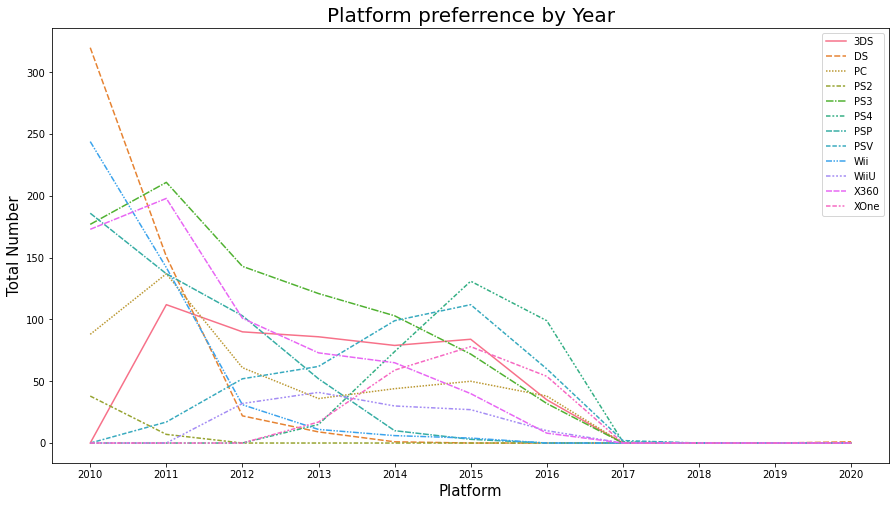

In [45]:
sns.set
plt.figure(figsize=(15, 8))

plt.title("Platform preferrence by Year", fontsize=20)
plt.xlabel("Platform", fontsize=15)
plt.ylabel("Total Number", fontsize=15)

sns.lineplot(data=plat_sales);

PS3가 플랫폼 중에서 가장 많은 선호도를 차지했으나, 2012년부터 PS4가 PS3보다 인기가 많다는 것을 알 수 있다. 

**최근 5년간 플랫폼 트랜드 **


<function matplotlib.pyplot.show>

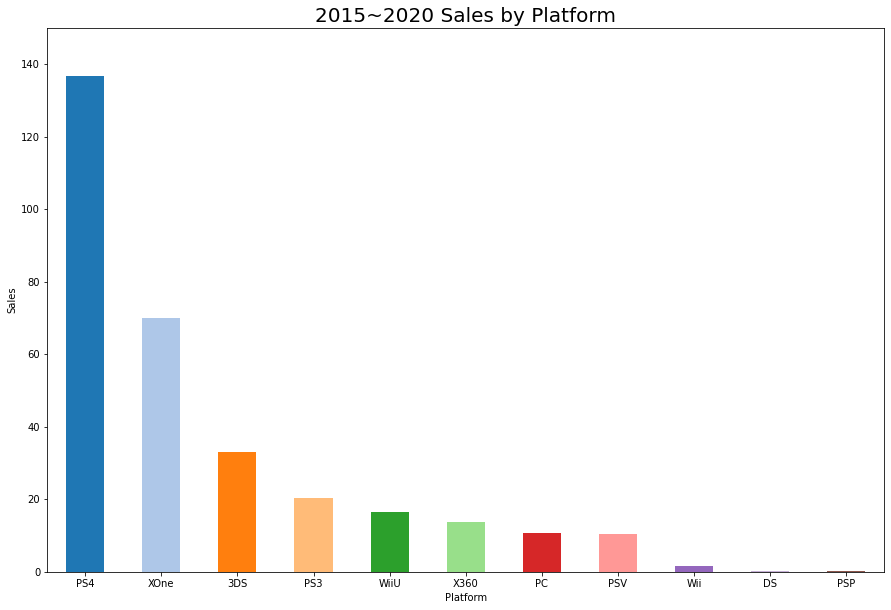

In [46]:
#groupby로 2000년대 각 플랫폼별 게임 판매량 순위 구하기/.sort_values()로 값이 큰 순서대로 정렬 
df4 = df.loc[(df['Year'] > 2014)]
df4 = df4.groupby(df4['Platform'])['All_Sales'].sum().sort_values(ascending = False)
#barplot 시각화
colors = sns.color_palette("tab20", 13)
df4.plot.bar(rot = 0, color = colors)

plt.rcParams["figure.figsize"] = (15, 8) #plt 크기 더 크게 조정
plt.title("2015~2020 Sales by Platform", fontsize = 20)
plt.ylabel("Sales")
plt.ylim(0,150)
plt.show

**가장 많이 판매된 게임 top 10**

In [47]:
sortdf = df.sort_values(by=['All_Sales'], ascending=False)
top_game_sale = sortdf.head(10)
top_game_sale = top_game_sale[['Name', 'Year', 'Genre', 'All_Sales']]
top_game_sale = top_game_sale.sort_values(by=['All_Sales'], ascending=False)
top_game_sale = top_game_sale.reset_index(drop=True)
top_game_sale = top_game_sale[["Name","All_Sales"]]
top_game_sale

#게임 top 10 뽑아내기

#df = df.loc[(df['Year'] > 1999)]
#df = df.groupby(df['Platform'])['All_Sales'].sum().sort_values(ascending = False)

,Name,All_Sales
0,Wii Sports,82.74
1,Super Mario Bros.,40.24
2,Mario Kart Wii,35.83
3,Wii Sports Resort,33.00
4,Pokemon Red/Pokemon Blue,31.38
5,Tetris,30.26
6,New Super Mario Bros.,30.01
7,Wii Play,29.01
8,New Super Mario Bros. Wii,28.61
9,Duck Hunt,28.31


In [3]:
plt.figure(figsize=(30,15))
a = sns.barplot(x = year_sales_top_game.index, y='All_Sales', data=top_game_sale)
i = 0
for name, val in zip(year_sales_top_game.Name, top_game_sale.All_Sales):
    if val >= 7:
        a.text(x=i, y=val-1, s=(name), ha='center',va='top', fontsize=15, rotation=90)
    else:
        a.text(x=i, y=val+1, s=(name), ha='center', fontsize=20, rotation=90)
    
    i+=1
a.set_title('Top 10 games of all time', fontsize=30)
plt.show()

NameError: ignored

<Figure size 2160x1080 with 0 Axes>

**10년 사이에 가장 많이 판매된 게임 탑 10**

In [49]:
year_sales_top_game = df[df.Year >= 2011].sort_values('All_Sales', ascending=False).head(10)
year_sales_top_game = year_sales_top_game.reset_index(drop=True)
year_sales_top_game

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,All_Sales
0,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39
1,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
3,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4.99,5.88,0.65,2.52,14.04
4,Call of Duty: Black Ops II,X360,2012,Shooter,Activision,8.25,4.30,0.07,1.12,13.74
5,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,Activision,5.54,5.82,0.49,1.62,13.47
6,Mario Kart 7,3DS,2011,Racing,Nintendo,4.74,3.91,2.67,0.89,12.21
7,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.99
8,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,Nintendo,4.23,3.37,3.08,0.65,11.33
9,Super Mario 3D Land,3DS,2011,Platform,Nintendo,4.89,2.99,2.13,0.78,10.79


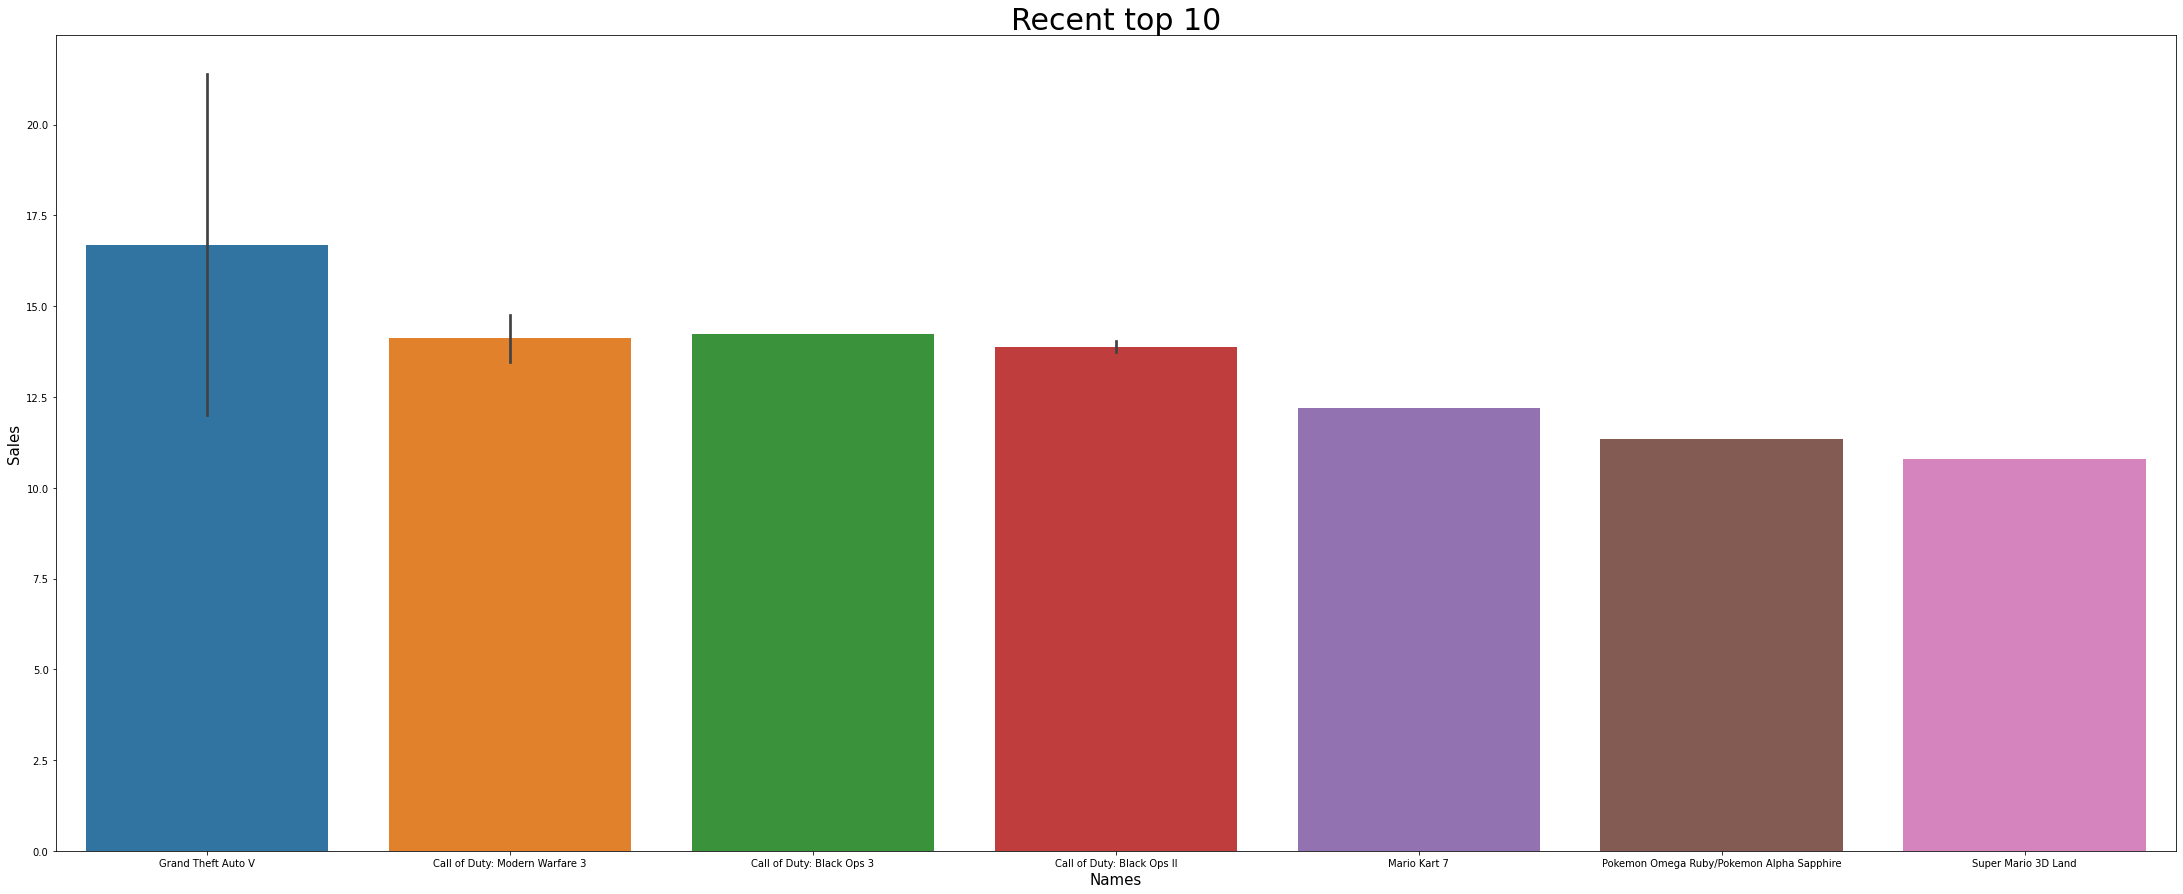

In [65]:
plt.figure(figsize=(30,15))
a = sns.barplot(x = year_sales_top_game.index, y='All_Sales', data=year_sales_top_game)
i = 0
for name, val in zip(year_sales_top_game.Name, year_sales_top_game.All_Sales):
    if val >= 7:
        a.text(x=i, y=val-1, s=(name), ha='center',va='top', fontsize=15, rotation=90)
    else:
        a.text(x=i, y=val+1, s=(name), ha='center', fontsize=20, rotation=90)
    
    i+=1
a.set_title('Top 10 games of all time', fontsize=30)
plt.show()

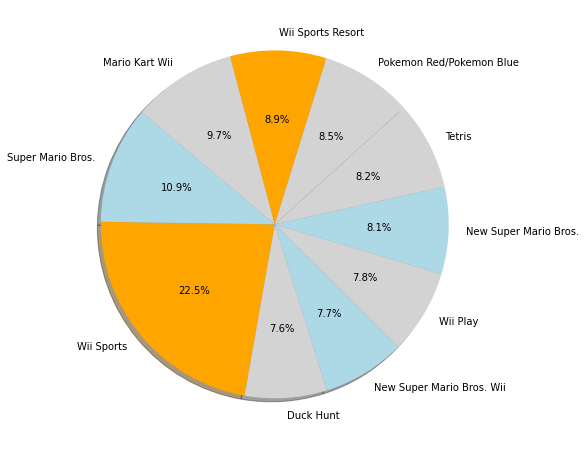

In [53]:
ratio = [22.42, 10.9, 9.7, 8.9,8.5,8.2,8.1,7.8,7.7,7.6]
labels = ['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', 'Wii Sports Resort','Pokemon Red/Pokemon Blue','Tetris','New Super Mario Bros.','Wii Play','New Super Mario Bros. Wii','Duck Hunt']
colors = ['Red', 'lightblue', 'lightgray', 'Orange', 'lightgray', 'lightgray', 'lightblue', 'lightgray', 'lightblue', 'lightgray']
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, colors = colors, counterclock=False,shadow=True)
plt.show()

**90년대 게임 추이 분석 및 시각화**

In [ ]:

#barplot 시각화
colors = sns.color_palette("tab20", 13)
df_90.plot.bar(rot = 0, color = colors)

plt.rcParams["figure.figsize"] = (20, 10) #plt 크기 더 크게 조정
plt.title("90s Game Preference", fontsize = 20)
plt.ylabel("sales")
plt.ylim(0,300)
plt.show

90년대에는 sports 게임의 출고량이 가장 많았고, 나머지는 전반적으로 균등하게 많이 출고되었다는 것을 알 수 있다. 판매량을 기준으로 했을때는 Platform이 가장 높고, sports, role-playing, racing, action 등이 비슷한 정도로 많이 팔렸다는 것을 알 수 있다. 

**00년대 게임 추이 분석 및 시각화**

In [ ]:
#barplot 시각화
colors = sns.color_palette("tab20", 13)
df_00.plot.bar(rot = 0, color = colors)

plt.rcParams["figure.figsize"] = (10, 5) #plt 크기 더 크게 조정
plt.title("00s Game Preference", fontsize = 20)
plt.ylabel("sales")
plt.ylim(0,1600)
plt.show

2000년부터는 게임의 수요가 압도적으로 많아진 시점으로, 전체적인 게임의 출고량이 가장 많았던 시기이다. Action과 Sports, Misc가 가장 많이 출고되었으며, 나머지 장르들도 비슷한 정도로 고르게 출고되었다. 

판매량을 기준으로 했을 때, Action과 sports가 가장 많이 팔렸고, misc, raciong, role-playing, shooter등이 비슷하게 인기가 좋았다. 

**2010년대 이상 게임 추이 분석 및 시각화**

In [ ]:
#barplot 시각화
colors = sns.color_palette("tab20", 13)
df_10.plot.bar(rot = 0, color = colors)

plt.rcParams["figure.figsize"] = (20, 10) #plt 크기 더 크게 조정
plt.title("2010s Game Preference", fontsize = 20)
plt.ylabel("sales")
plt.ylim(0,1400)
plt.show

시각화를 통해 얻을 수 있는 인사이트:



지난 10년간 게임의 추이를 살폈을 때, Action게임의 출고량이 압도적으로 많았다. 그 외에는 sports, misc, adventure, roleplaying 등이 있다. 
판매량으로는 action, shooter, sports 등이 순위가 높았다. 

In [ ]:
#중복되지 않는 전체 name 리스트 확인하기
import sys
np.set_printoptions(threshold=sys.maxsize)
df.Name.unique()